In [ ]:
# Tool
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

from sklearn.model_selection import train_test_split

%matplotlib inline

#### 1.7 アイリスのクラス分類

In [2]:
# データを読む
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print('Keys of iris_dataset: \n{}'.format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# DESCR(データセットの簡単な確認)の説明
print(iris_dataset['DESCR'][:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


In [5]:
# target_namesの確認
print('Target name: {}'.format(iris_dataset['target_names']))

Target name: ['setosa' 'versicolor' 'virginica']


In [6]:
# feature_namesの確認
print('Featur name: \n {}'.format(iris_dataset['feature_names']))

Featur name: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# dataの型確認
print('Type of data: {}'.format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [8]:
# data数の確認
print('Shape of data: {}'.format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [9]:
# dataの最初の5行を確認
print('First five columns of data:\n{}'.format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [10]:
# targetの型確認
print('Type of target: {}'.format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [11]:
# taret数の確認
print('Shapse of target: {}'.format(iris_dataset['target'].shape))

Shapse of target: (150,)


In [12]:
# 0はsetosa, 1はversicolor, 2はvirginica
print('Target:\n{}'.format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 1.7.2 訓練データとテストデータを分ける

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0) # random_stateは出力を同じ結果にするのに使用

In [14]:
# 訓練データの数を確認
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [15]:
# testデータの数確認
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


#### 1.7.3 データを観察する

In [16]:
# X_trainのデータからDataFrameを作る
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


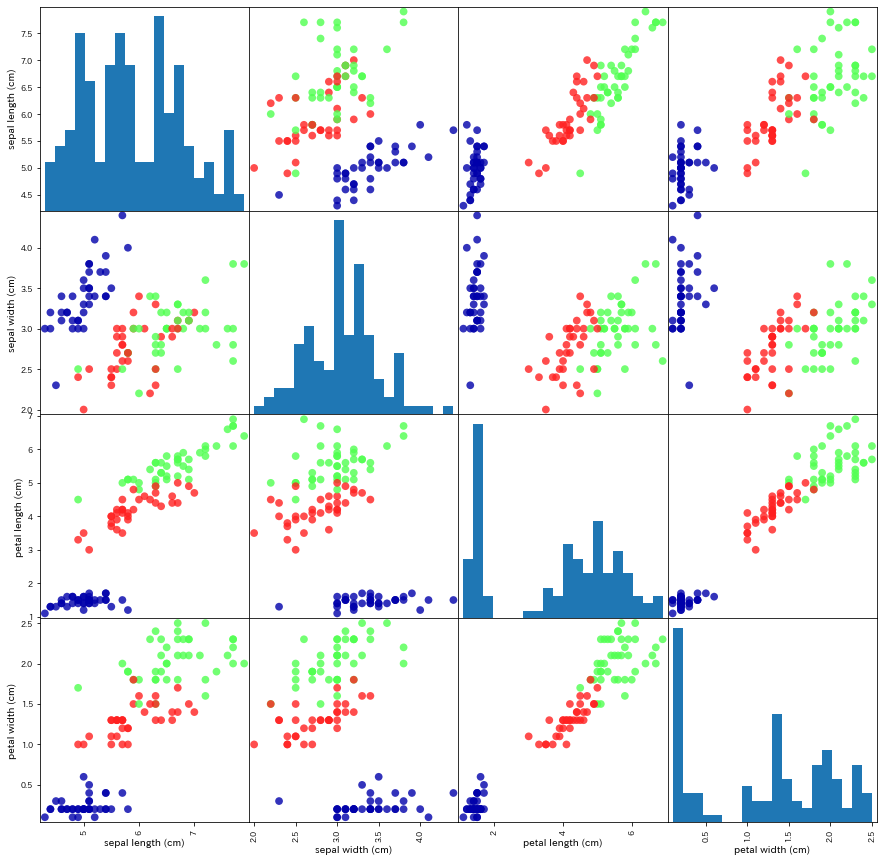

In [17]:
# データフレームからscatter matrixを作成し、y_trainに従って色を付ける
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

#### 1.7.4 k-最近傍法

In [18]:
# オブジェクトを作成する
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### 1.7.5 予測を行う

In [20]:
# 新規データを作成する
X_new = np.array([[5, 2.9, 1, 0.2]]) # sk-learnは入力は常に2次元NUmPy配列が必要
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [21]:
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predictedd target name:{}'.format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predictedd target name:['setosa']


#### 1.7.6 モデルの評価

In [22]:
# テストデータを判定させる
y_pred = knn.predict(X_test)
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [23]:
# テストデータの精度を確認する
print('Test sest score: {:.2f}'.format(knn.score(X_test, y_test)))

Test sest score: 0.97


## 第2章　教師あり学習

#### 2.1 クラス分類と回帰

#### 2.3.1 サンプルデータセットの確認

In [24]:
# データセットの生成(forgeデータセット)
X, y = mglearn.datasets.make_forge()

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shepe:(26, 2)


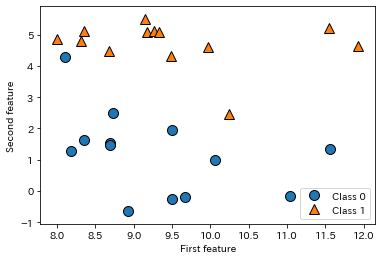

In [25]:
# データセットをプロット
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shepe:{}'.format(X.shape))

Text(0, 0.5, 'Target')

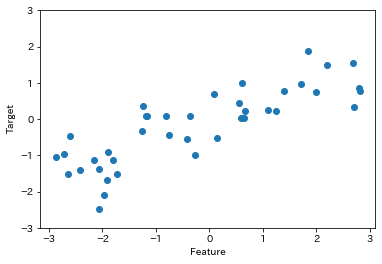

In [26]:
# データセットの生成(waveデータセット)
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [27]:
# データセットの生成(cancerデータセット)#
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [28]:
# データサイズの確認
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [29]:
# クラスことのサンプル数
# benign:良性、malignant:悪性
print('Sample counts per class:\n{}'.format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [30]:
# 個々の特徴量の意味
print('Feature names:\n{}'.format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [31]:
# データセットの生成(bostonデータセット)
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape: {}'.format(boston.data.shape))

Data shape: (506, 13)


In [32]:
# データセットを拡張し、特徴量間の積を含めたデータ
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


### 2.3.2 k-最近傍法(k-NN)

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


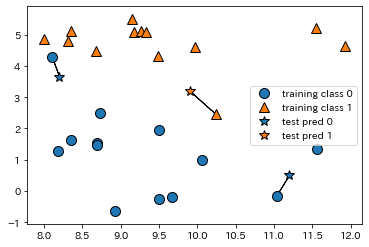

In [33]:
# forgeデータセットに対するクラス分類
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


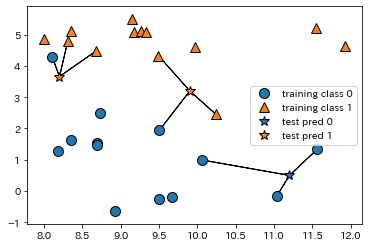

In [34]:
# 3つの近傍点を用いる
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [35]:
# frogeデータを訓練データとテストデータに分割する
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
# クラスをインポートしてインスタンスを生成する、近傍点は3とする
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [37]:
# 訓練データからクラス分類器を訓練する
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [38]:
# テストデータに対して予測を行う(predictメソッド)
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [39]:
# モデルの汎化性能を評価する(scoreメソッド)
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


#### 2.3.2.2 KNeighborsClassifierの解析

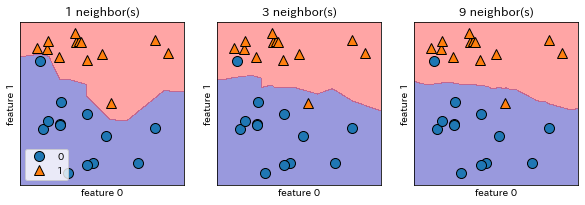

In [40]:
fig, axes = plt.subplots(1,3, figsize=(10, 3))

for n_neighbors, ax in zip([1,3,9], axes):
    # fitメソッドは自分自身を返すので、1行でインスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)    

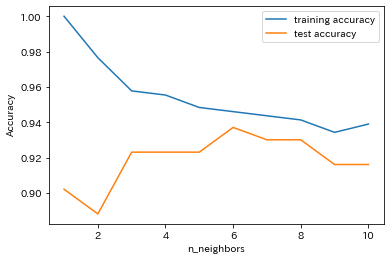

In [41]:
# cancerデータを用いてモデルの複雑さと汎化性能の関係性を調べる
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #　モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

#### 2.3.2.3 K-近傍回帰

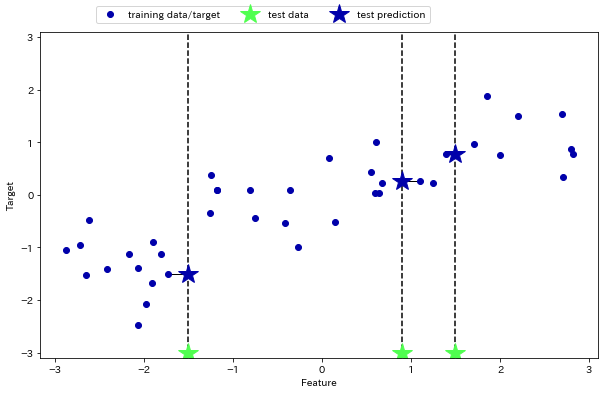

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

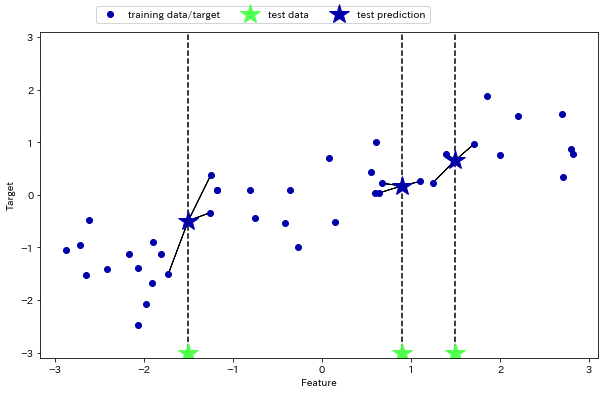

In [43]:
# 複数の最近傍点を用いる場合は、最近傍点の平均点を用いる
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [44]:
# 回帰のためのk-最近傍アルゴリズム
from sklearn.neighbors import KNeighborsRegressor

In [45]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [46]:
# waveデータセットを訓練セットとテストセットに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [47]:
# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)

In [48]:
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [49]:
# testデータの予測値を表示
print('Test set predictions:\n{}'.format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [50]:
# testデータの決定係数を表示
print('Test set R^2:{:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2:0.83


#### 2.3.2.4 KNeighborrsRegressorの解析

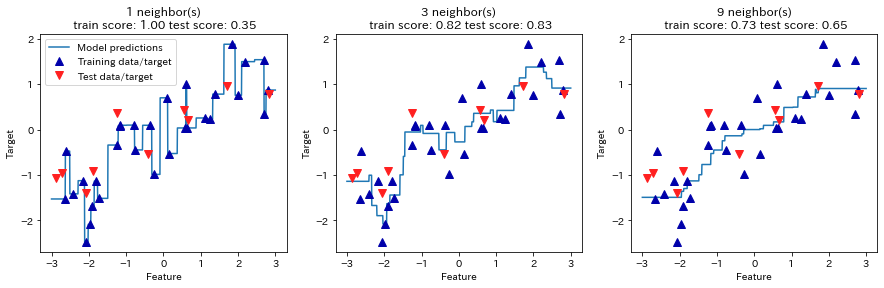

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# -3から3までの間に1000点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^',c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    '{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target','Test data/target'], loc='best')    

## 2.3.3 線形モデル 

w[0]: 0.393906  b: -0.031804


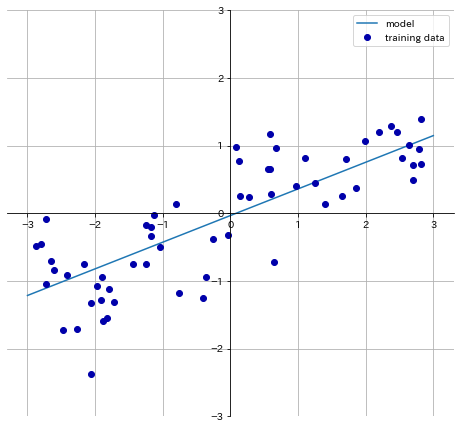

In [52]:
# 1次元のwageデータセットでw[0]とbを求める
mglearn.plots.plot_linear_regression_wave()

#### 2.3.3.2 線形回帰(通常最小二乗法)

In [53]:
# 予測と真の回帰ターゲットyとの平均二乗誤差が最小になるようにパラメータwとbを求める

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [54]:
# 傾き(w)は重み or 係数と呼ばれcoef_属性に格納される
# オフセット or 切片はintercept_属性に格納される
print('lr.coef_:{}'.format(lr.coef_))
print('lr.intercept_:{}'.format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [55]:
# 訓練セットとテストセットに対する性能を確認する
print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

Training set score:0.67
Test set score:0.66


In [56]:
# boston_housingデータセット使ってLineraRegressionを行う
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [57]:
# 訓練セットとテストセットに対する性能を確認する
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


#### 2.3.3.3 リッジ回帰

In [58]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [59]:
# alphaパラメータを変更してスコアを確認する
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [60]:
# alphaパラメータを変更してスコアを確認する
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


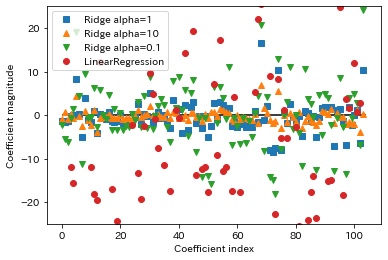

In [61]:
# グラフで確認
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

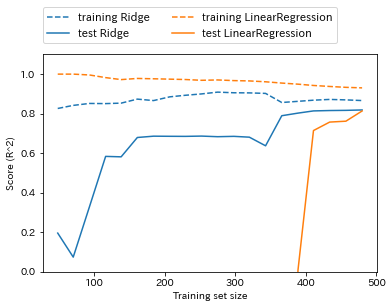

In [62]:
# alphaの値を固定して利用できる訓練データの量を変化させる
mglearn.plots.plot_ridge_n_samples()

#### 2.3.3.3 Lasso回帰

In [63]:
from sklearn.linear_model import Lasso


lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ !=0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [64]:
# 'max_iter'の値をふやしている
# こうしておかないとモデルが、'max_iter'を増やすように警告を発する
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_ !=0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [65]:
# alphaを小さくしすぎると、過剰適合する
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_ !=0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 33


Text(0, 0.5, 'Coefficient magnitude')

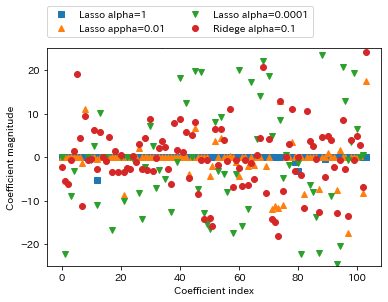

In [66]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso appha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridege alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

#### 2.3.3.5 クラス分類のための線形モデル

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


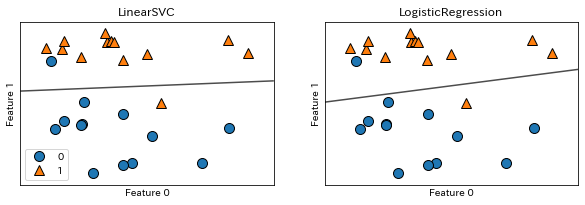

In [67]:
# ロジスティク回帰と線形SVCをforgeデータセットに適用して、決定境界を可視化する
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()    

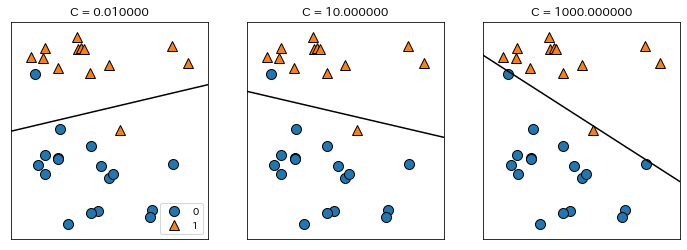

In [68]:
# 正則化パラメータCを小さくすると大多数に対して適合、大きいCを用いると個々のデータポイントを正確に分類することを重視
mglearn.plots.plot_linear_svc_regularization()

In [69]:
# LogisticRegressionをcancerデータセットを用いて詳しく解析
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
# C=100で再度確認
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
# C=0.01で再度確認
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


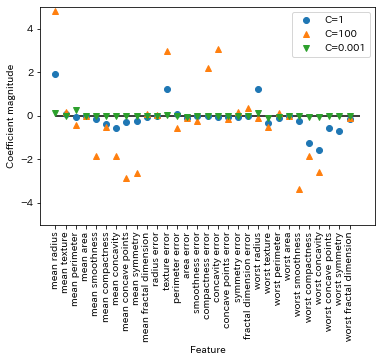

In [72]:
# 3つの正則化パラメータCに対して学習された係数を確認する
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.legend()

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training axxuracy of l1 logreg with C=0.001: 0.91
Test axxuracy of l1 logreg with C=0.001: 0.92
Training axxuracy of l1 logreg with C=1.000: 0.96
Test axxuracy of l1 logreg with C=1.000: 0.96
Training axxuracy of l1 logreg with C=100.000: 0.99
Test axxuracy of l1 logreg with C=100.000: 0.98


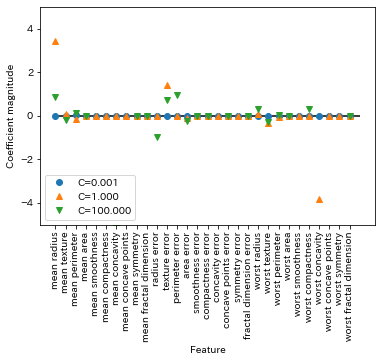

In [73]:
#L1正則化を行ったときの分類精度
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('Training axxuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Test axxuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')

plt.ylim(-5, 5)
plt.legend(loc=3)    

#### 2.3.3.6 線形モデルによる多クラス分類

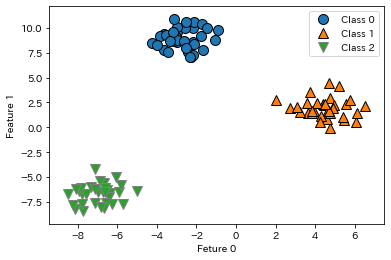

In [74]:
# 3クラスからなる2次元のトイデータセット
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.xlabel('Feture 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [75]:
# LineraSVCクラス分類器で学習させる
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape:', linear_svm.coef_.shape)
print('Intercept shape:', linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


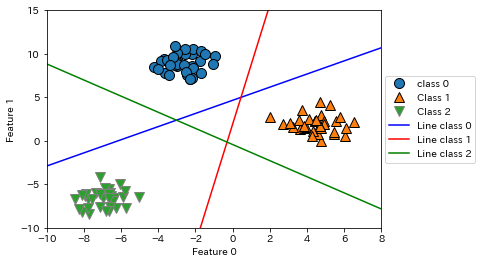

In [76]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

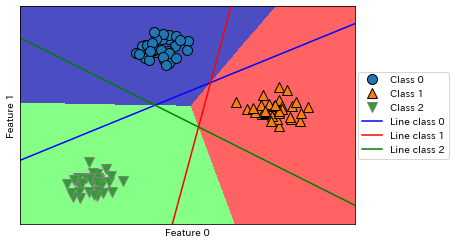

In [77]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

### 2.3.4 ナイーブベイズクラス分類器

In [78]:
# BernoulliNBクラス分類器は個々のクラスに対して、特徴量ごとに非ゼロである場合をカウントする
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y= np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    # クラスに対してループ
    # それぞれの特徴量ごとに非ゼロの数を(加算)数える
    counts[label] = X[y == label].sum(axis=0)
print('Feature counts:\n{}'.format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### 2.3.5 決定木

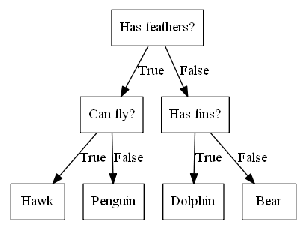

In [79]:
mglearn.plots.plot_animal_tree()

In [80]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [81]:
# 木の深さを4に設定
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### 2.3.5.3 決定木の解析

In [82]:
# treeモジュールのexport_graphviz関数を使って可視化する
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benigin'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

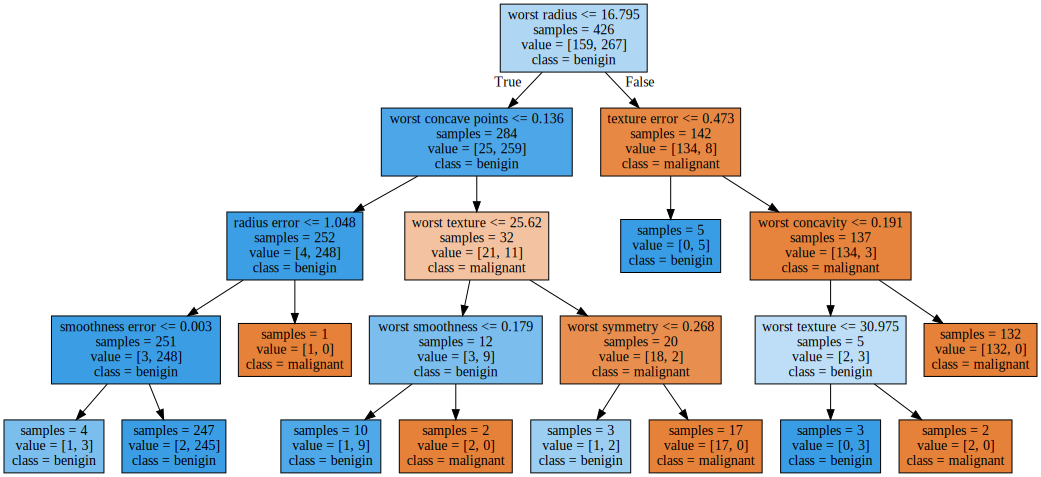

In [83]:
# .dotファイルを読み込む
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    

#### 2.3.5.4 決定木の特徴量の重要性

In [84]:
print('Feature importtances:\n{}'.format(tree.feature_importances_))

Feature importtances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


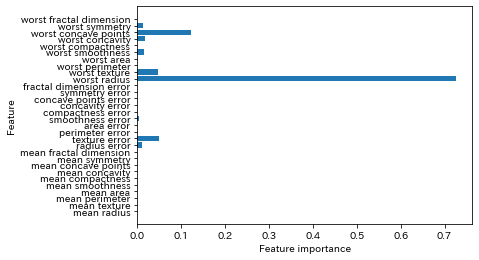

In [85]:
# 特徴量の重要度を可視化する
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importances_cancer(tree)    

Feature importances: [0. 1.]


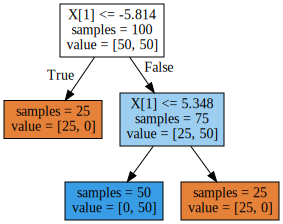

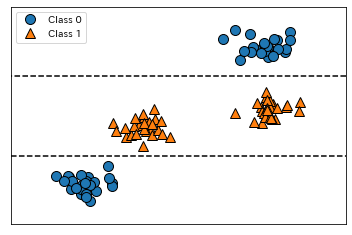

In [86]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

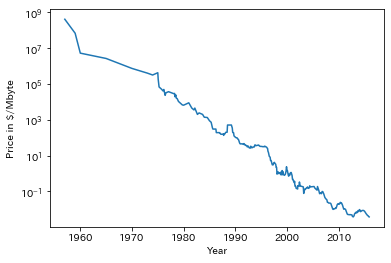

In [87]:
# RAM価格の履歴データセットを使ってDecisionTreeRegressorを確認する
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [88]:
from sklearn.tree import DecisionTreeRegressor
# 過去のデータを用いて2000年以降の価格を予想する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予測
X_train = data_train.date[:, np.newaxis]
# データとターゲットの関係を単純にするために対数変換
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 全ての価格を予想
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

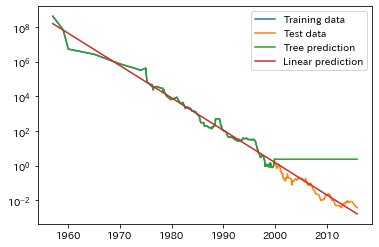

In [89]:
plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear prediction')
plt.legend()

### 2.3.6 決定木のアンサンブル法

#### 2.3.6.1 ランダムフォレスト

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

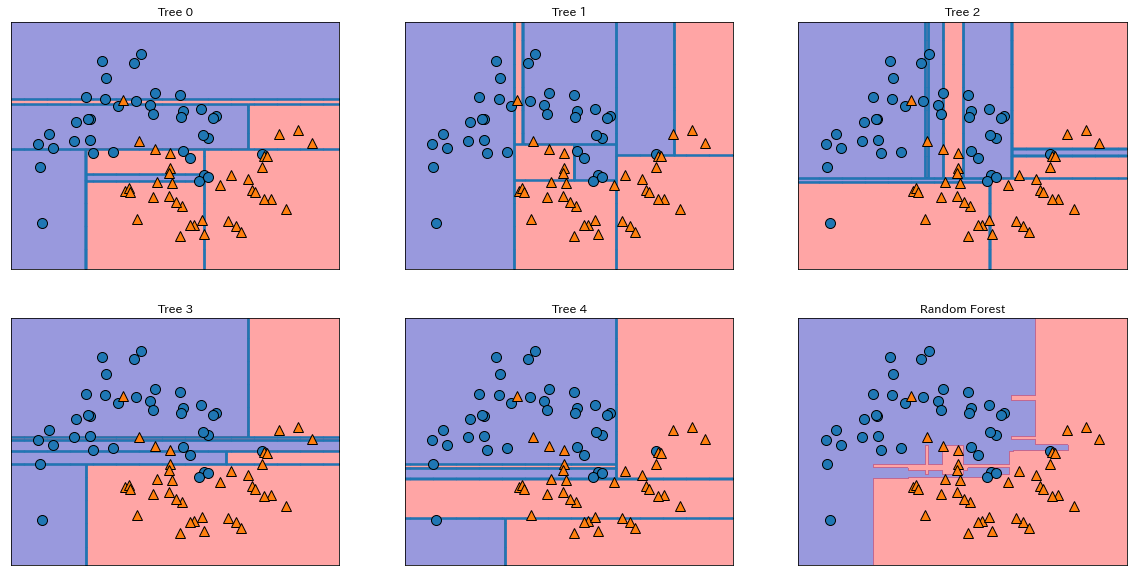

In [91]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [92]:
# cancerデータセットにに対して100個の決定木を用いたランダムフォレストを適用
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accurady on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accurady on training set: 1.000
Accuracy on test set: 0.972


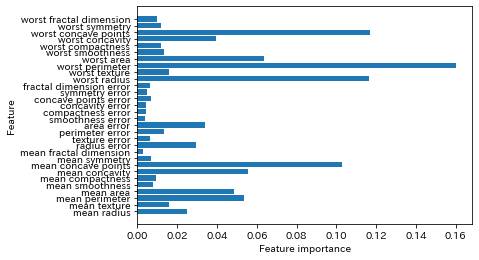

In [93]:
plot_feature_importances_cancer(forest)

#### 2.3.6.2 勾配ブースティング回帰木(勾配ブースティングマシン)

In [94]:
# cancerデータで確認
from sklearn.ensemble import GradientBoostingClassifier
                             
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [95]:
# 深さの最大値を制限
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [96]:
# 学習率を変更
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


In [97]:
# 特徴量の重要度を可視化してモデルの詳細を見る


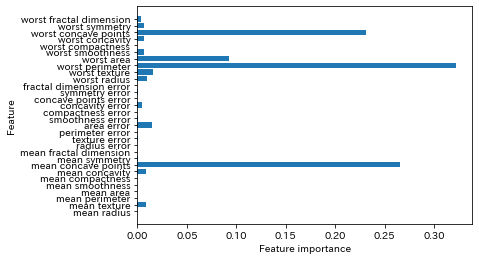

In [98]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### 2.3.7 カーネル法を用いたサポートベクターマシン

#### 2.3.7.1 線形モデルと非線形特徴量

Text(0, 0.5, 'Feature 1')

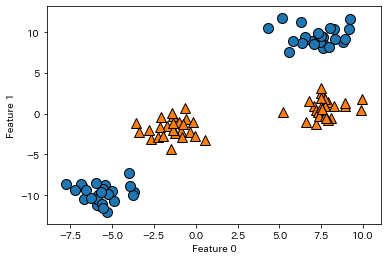

In [99]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

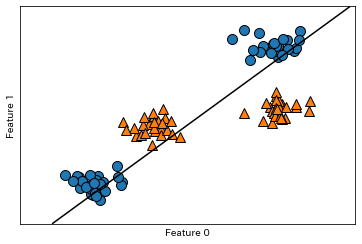

In [100]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0.5, 0, 'feature1 ** 2')

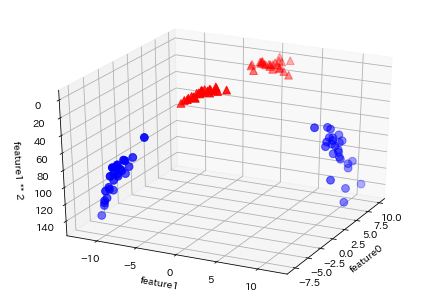

In [101]:
# 2番目の特徴量の2乗を追加
X_new = np.hstack([X, X[:, 1:] **2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3Dで可視化
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0の点をプロットしてからy == 1 の点をプロット
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

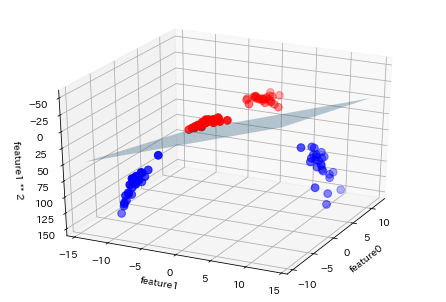

In [102]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 線形決定境界を描画
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY , ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', cmap=mglearn.cm2, s=60)

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

Text(0, 0.5, 'Feature 1')

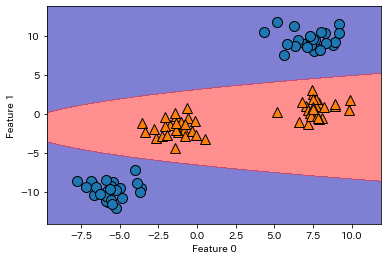

In [103]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### 2.3.7.2 カーネルトリック

Text(0, 0.5, 'Feature 1')

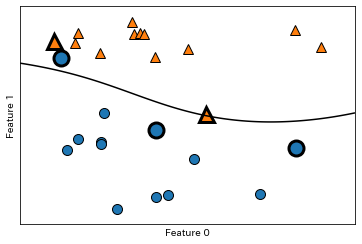

In [104]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel= 'rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

#サポートベクタをプロットする
sv = svm.support_vectors_
#サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### 2.3.7.4 SVMパラメータの調整

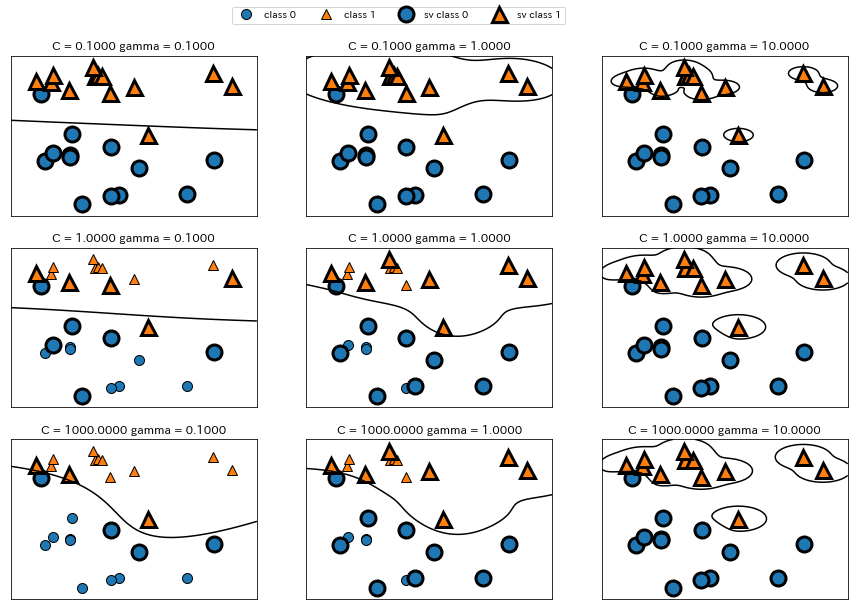

In [105]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'],ncol=4, loc=(.9, 1.2))        

In [106]:
# RBFカーネル法を用いたSVMをcancerデータセットに適用
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Axxuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Axxuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Axxuracy on training set: 1.00
Axxuracy on test set: 0.63


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


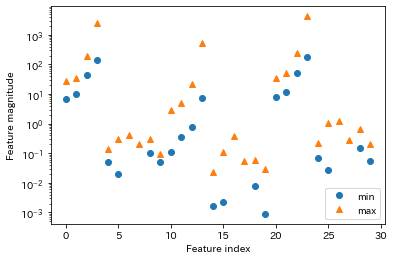

In [107]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel('Feature magnitude')
plt.yscale('log')

#### 2.3.7.5 SVMのためのデータの前処理
##### 全ての特徴量が0から1の間になるように変換する(MinMaxXcaler)

In [108]:
# 訓練セットの特徴量ごとに最小値を計算
min_on_training = X_train.min(axis=0)
# 訓練セットの特徴量ごとにレンジ(最大値-最小値)を計算
range_on_training = (X_train - min_on_training).max(axis=0)

# 最小値を引いてレンジで割る
# 個々の特徴量はmin=0, max=1となる
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print('Maximum for each feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [109]:
# テストセットに対しても、まったく同じ変換を行う
# 訓練セットの最小値とレンジを用いる
X_test_scaled = (X_test - min_on_training) / range_on_training

In [110]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Axxuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print('Axxuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Axxuracy on training set: 0.948
Axxuracy on test set: 0.951


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [111]:
# Cやgammaを増やしてより複雑なモデルを作成する
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Axxuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print('Axxuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Axxuracy on training set: 0.988
Axxuracy on test set: 0.972


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 2.3.8 ニューラルネットワーク(ディープラーニング)

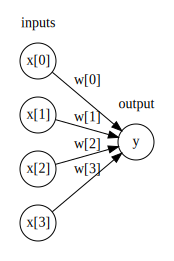

In [112]:
display(mglearn.plots.plot_logistic_regression_graph())

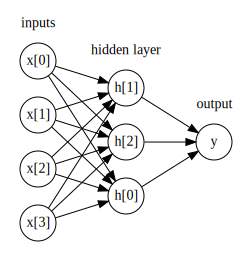

In [113]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

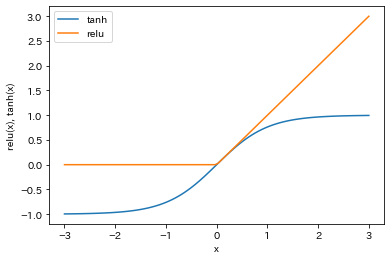

In [114]:
# 活性化関数tanhとrelu
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line,np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

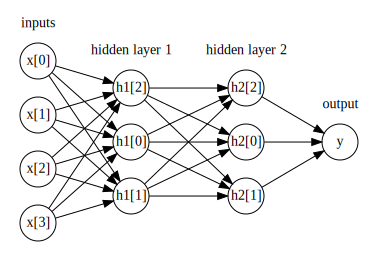

In [115]:
mglearn.plots.plot_two_hidden_layer_graph()

#### 2.3.8.2 ニューラルネットワークのチューニング

Text(0, 0.5, 'Feature 1')

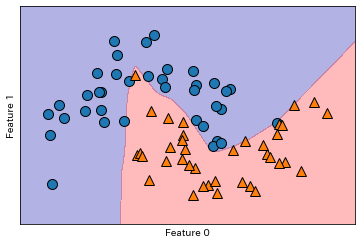

In [116]:
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

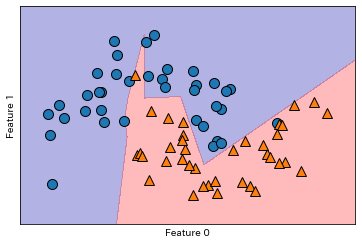

In [117]:
# MLPの隠れユニットサイズを10に変更する
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

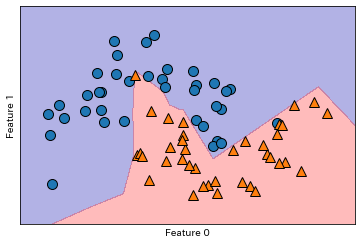

In [118]:
# それぞれ10ユニットの隠れ層を2層使う
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

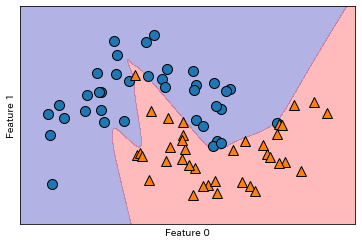

In [119]:
# それぞれ10ユニットの隠れ層を2層使う.さらに非線形活性化関数にtanhを使う
mlp = MLPClassifier(solver='lbfgs',activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

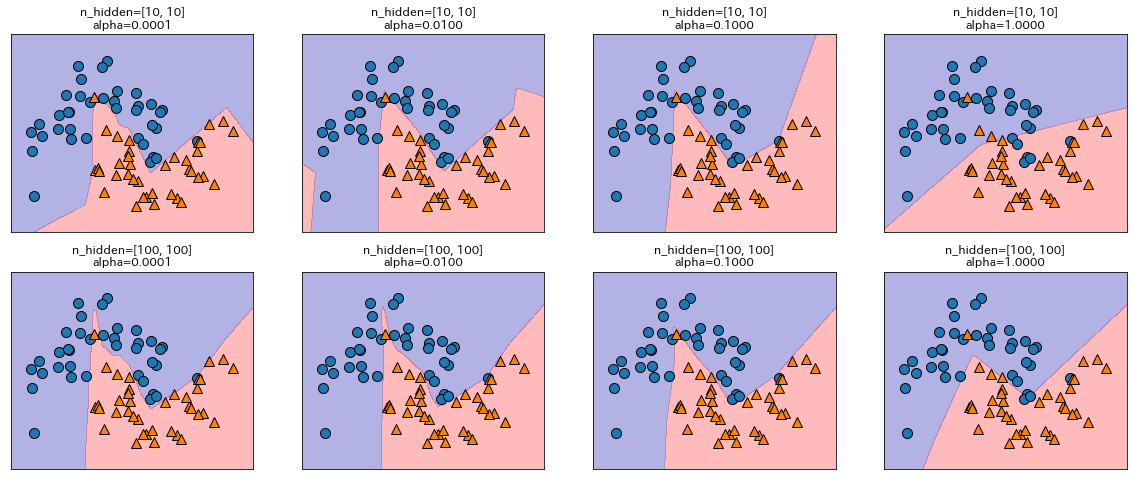

In [120]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

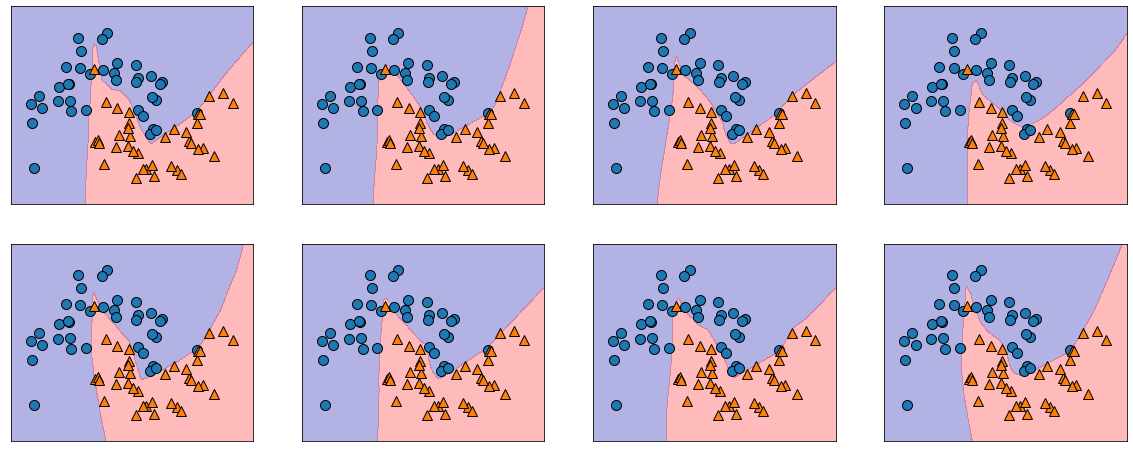

In [121]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)    

In [122]:
# cancerデータに対してMLPClassifierを適用
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [123]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [126]:
# 訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# これでmean=0, std=1になる
X_train_scaled = (X_train- mean_on_train) / std_on_train
# まったく同じ変換(訓練データの平均と標準偏差を使って)をテストセットに渡す
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [127]:
# 繰り返し回数を増やす
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [128]:
# alphaパラメータを0.0001から1に上げて、重みに対する正則化を強化する
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


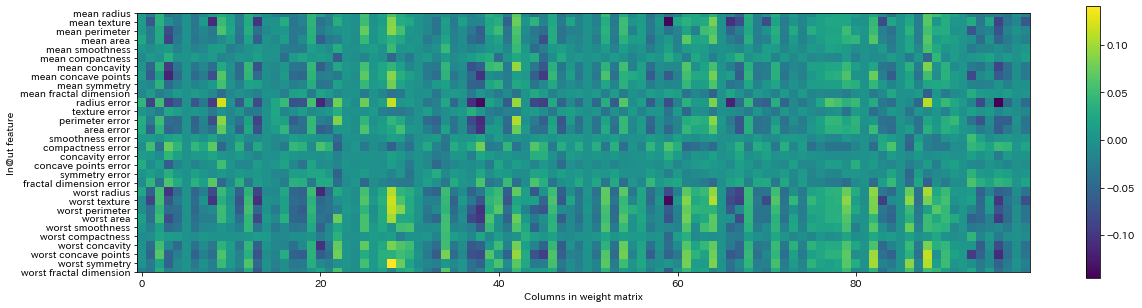

In [129]:
# 行30の特徴量,列は100の隠れユニットでcancerデータのヒートマップ
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

## 2.4 クラス分類器の不確実性推定

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# わかりやすいようにクラスをblueとredにする
y_named = np.array(['blue', 'red'])[y]

# train_test_splitは任意の数の配列に適用できる
# すべての配列は整合するように分割される
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)

# 勾配ブースティングモデルを構築
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### 2.4.1 決定関数(Decision Function)

In [5]:
print("X_test.shape:{}".format(X_test.shape))
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

X_test.shape:(25, 2)
Decision function shape: (25,)


In [6]:
# decision_functionの最初のいくつかを表示
print('Dexison function:\n{}'.format(gbrt.decision_function(X_test)[:6]))

Dexison function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [7]:
print('Thresholded decision function:\n{}'.format(gbrt.decision_function(X_test) > 0))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [8]:
# True/Falseを0/1に
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# c/1をclasses_のインデックスに使う
pred = gbrt.classes_[greater_zero]
# predはgbrt.predictの出力と同じになる
print('pred is equal to predictions: {}'.format(np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [9]:
decision_function = gbrt.decision_function(X_test)
print('Decision function minimum: {:.2f} maximum:{:.2f}'.format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum:4.29


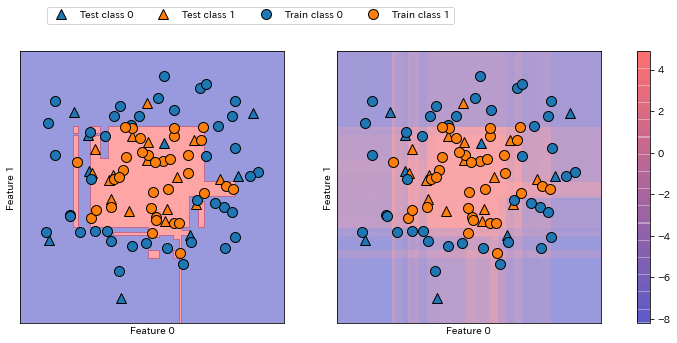

In [10]:
# 決定境界と2次元平面上のすべての点に対するdecision_functionの値で色付けした図
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 訓練データポイントとテストデータポイントをプロット
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'], ncol=4, loc=(.1, 1.1))

### 2.4.2 確率の予測

In [11]:
print('Shape of probabilities: {}'.format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [12]:
# predict_probaの出力の最初の数行を見る
print('predicted probabilities:\n{}'.format(gbrt.predict_proba(X_test[:6])))

predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


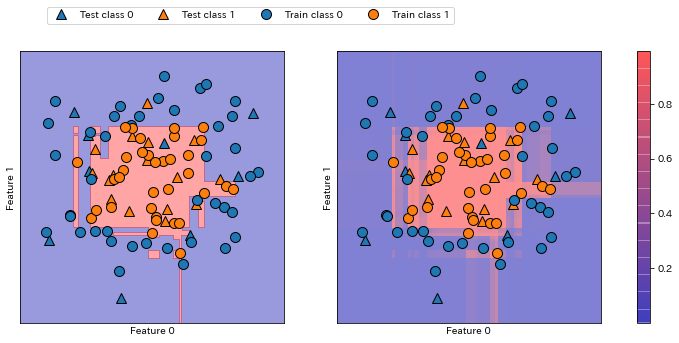

In [13]:
# 決定境界と2次元平面上のすべての点に対するdecision_functionの値で色付けした図
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 訓練データポイントとテストデータポイントをプロット
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'], ncol=4, loc=(.1, 1.1))

### 2.4.3 多クラス分類の不確実性

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))
# 決定関数の最初のいくつかを表示
print('Decision function:\n{}'.format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [17]:
print('Argmax of decision function:\n{}'.format(
    np.argmax(gbrt.decision_function(X_test),axis=1)))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [19]:
# predict_probaの結果の最初の数行を表示
print('Predicted probabilities:\n{}'.format(gbrt.predict_proba(X_test)[:6]))
print('Sums: {}'.format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums: [1. 1. 1. 1. 1. 1.]


In [20]:
print('Argmax of predicted probabilities:\n{}'.format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# irisデータセットのクラス名で表示する
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print('unique classes in training data: {}'.format(logreg.classes_))
print('predictions: {}'.format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print('argmax of decision function: {}'.format(argmax_dec_func[:10]))
print('argmax combined with classes_: {}'.format(logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
